In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
(digits, LUT), (digits_Test, LUT_Test) = mnist.load_data()

In [3]:
#clean img
digits = digits/255
digits = digits.reshape(digits.shape[0], 28, 28, 1)

digits_Test = digits_Test/255
digits_Test = digits_Test.reshape(digits_Test.shape[0], 28, 28, 1)

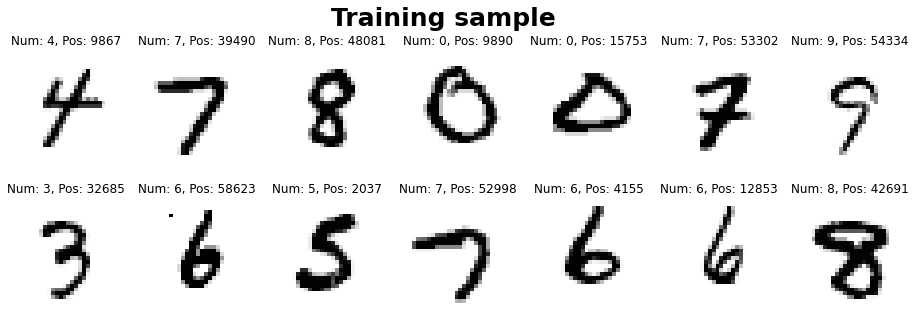

In [4]:
fig = plt.figure(figsize=(16,5))
fig.suptitle('Training sample', fontsize=25, fontweight='bold')

for i in range(14):
    idx = randint(0, len(digits)-1)
    plt.subplot(2,7,i+1)
    plt.title(f'Num: {LUT[idx]}, Pos: {idx}')
    plt.imshow(digits[idx], cmap='Greys')
    plt.axis('off')
plt.show()

In [5]:
# convertir cada entero en listas de ceros y unos donde la posicion donde haya
# un numero 1, es el numero que representa la lista.
# Esto para usar dicha lista como el desired output de la red
LUT = to_categorical(LUT, 10)
LUT_Test = to_categorical(LUT_Test, 10)

In [9]:
LUT.shape

(60000, 10)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(28, 28, 1)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [8]:
digits.shape

(60000, 28, 28, 1)

In [9]:
batch_size = 128
epochs = 10

model.fit(digits, LUT,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(digits_Test, LUT_Test))

score = model.evaluate(digits_Test, LUT_Test, verbose=0)

print('Loss:', score[0])
print('Accuracy:', score[1])
model.save("DigitRecognizer.h5")

Epoch 1/10
469/469 [==============================] - 30s 64ms/step - loss: 0.2468 - accuracy: 0.9252 - val_loss: 0.0533 - val_accuracy: 0.9833
Epoch 2/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0855 - accuracy: 0.9742 - val_loss: 0.0369 - val_accuracy: 0.9874
Epoch 3/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0625 - accuracy: 0.9811 - val_loss: 0.0340 - val_accuracy: 0.9890
Epoch 4/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0305 - val_accuracy: 0.9908
Epoch 5/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0280 - val_accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 7/10
469/469 [==============================] - 32s 67ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0303 - val_accuracy:

In [42]:
r = randint(0, len(digits_Test)-1)
tval = digits_Test[r]
tval = tval.reshape(1,28,28,1)

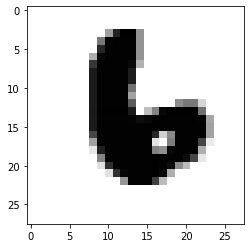

In [43]:
plt.imshow(-tval[0], cmap='gray')

In [44]:
model.predict(tval).argmax()

6

In [ ]:
tt